In [9]:
#!/usr/bin/env python
#-*- encoding: utf-8 -*-

import requests
import time
import re
from lxml import etree
import pandas as pd

def is_all_chinese(strs):
    for _char in strs:
        if not '\u4e00' <= _char <= '\u9fa5':
            return False
    return True

def getList():
    start_url = 'https://book.douban.com/tag/青春?&type=T&start={}'
    i = 0
    infoList = []
    print(0)
    while i < 6: 
        url = start_url.format(i*20)
        kv = {'User-Agent': 'Mozilla/5.0'} 
        r = requests.get(url,headers=kv) 
        selector = etree.HTML(r.text)
        i += 1
        informations = selector.xpath('.//ul[@class="subject-list"]/li')
        
        for inf in informations: 
            info_bookname = inf.xpath('normalize-space(.//div[@class="info"]/h2/a/@title)')
            info_str = inf.xpath('normalize-space(.//div[@class="pub"]/text())')#[0].replaceAll("\r|\n", "")
            info_author = ''
            strlist = info_str.split('/')
            k = 0
            index = 0
            while k < len(strlist):
                if("出版" in strlist[k]):
                    index = k
                    break
                k += 1
            if(k == len(strlist)):
                info_publisher = '***'
                s=0
                index1 = 0
                while s < len(strlist):
                    if("." in strlist[s]):
                        info_price = strlist[s]
                        #index1 = s
                        index = s-1
                        break
                    s += 1
                if(s == len(strlist)):
                    info_price = strlist[len(strlist)-1]
                    index = len(strlist)-2
            else:
                info_publisher = strlist[index]#.replaceAll("\r|\n", "")
                info_price = strlist[index+2]#.replace('.','')#.replaceAll("\r|\n", "")
            j = 0
            while j < index:
                info_author += strlist[j]
                j += 1
                
            if("元" not in info_price):
                info_price = info_price+"元" 
            info_score = inf.xpath('normalize-space(.//span[@class="rating_nums"]/text())')#[0].replaceAll("\r|\n", "")
            info_commentsnum = inf.xpath('normalize-space(.//span[@class="pl"]/text())')#[0].replaceAll("\r|\n", "")            
            if(is_all_chinese(info_bookname)):
                infoList.append([info_bookname,info_author,info_publisher,info_price,info_score,info_commentsnum])
        time.sleep(10)
    return infoList


def listToCsv(list):
    df = pd.DataFrame(list,columns=['书名','作者','出版社','售价','豆瓣评分','评论数量'])
    file = open("1.csv", "w", encoding='utf-8')
    df.to_csv(file, line_terminator="\n", index=False)
    file.close()
    print(df)
    return list
 
def main():
    List = getList() 
    listToCsv(List)
 
 
if __name__=='__main__': 
	main()

0


PermissionError: [Errno 13] Permission denied: '1.csv'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import json
from urllib.request import urlopen, quote
import requests
import csv
import re, pandas as pd
from sklearn.preprocessing import StandardScaler
#import warnings
#warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("C:/Users/DELL/1.csv")
df

,书名,作者,出版社,售价,豆瓣评分,评论数量
0,撒野,巫哲,北京联合出版公司,45.00元,8.6,(29981人评价)
1,梦里花落知多少,郭敬明,春风文艺出版社,20.00元,7.1,(166270人评价)
2,挪威的森林,[日] 村上春树 林少华,上海译文出版社,18.80元,8.0,(322683人评价)
3,麦田里的守望者,[美国] J. D. 塞林格 孙仲旭,译林出版社,28.00元,8.1,(65185人评价)
4,那些回不去的年少时光,桐华,江苏文艺出版社,23.80元,8.4,(50640人评价)
...,...,...,...,...,...,...
84,陪安东尼度过漫长岁月,安东尼,长江文艺出版社,18.00元,8.3,(64622人评价)
85,像少年啦飞驰,韩寒,作家出版社,16.00元,7.3,(40419人评价)
86,西决,笛安,长江文艺出版社,22.80元,7.9,(56442人评价)
87,血色浪漫,都梁,人民文学出版社,40.00元,8.9,(3296人评价)


In [13]:
publisher = df[(True^df['出版社'].isin([0]))]

In [14]:
publisher['value'] = 1#添加计数器
publisher

,书名,作者,出版社,售价,豆瓣评分,评论数量,value
0,撒野,巫哲,北京联合出版公司,45.00元,8.6,(29981人评价),1
1,梦里花落知多少,郭敬明,春风文艺出版社,20.00元,7.1,(166270人评价),1
2,挪威的森林,[日] 村上春树 林少华,上海译文出版社,18.80元,8.0,(322683人评价),1
3,麦田里的守望者,[美国] J. D. 塞林格 孙仲旭,译林出版社,28.00元,8.1,(65185人评价),1
4,那些回不去的年少时光,桐华,江苏文艺出版社,23.80元,8.4,(50640人评价),1
...,...,...,...,...,...,...,...
84,陪安东尼度过漫长岁月,安东尼,长江文艺出版社,18.00元,8.3,(64622人评价),1
85,像少年啦飞驰,韩寒,作家出版社,16.00元,7.3,(40419人评价),1
86,西决,笛安,长江文艺出版社,22.80元,7.9,(56442人评价),1
87,血色浪漫,都梁,人民文学出版社,40.00元,8.9,(3296人评价),1


In [62]:
df_publisher = publisher[ ['出版社','value'] ].groupby(['出版社']).sum()#按照出版社进行分组，得到不同出版社的图书数量
df_pbler=df_publisher.sort_values(by=['value'],ascending=False)
df_pbler

,value
出版社,
上海译文出版社,9
长江文艺出版社,6
北京十月文艺出版社,4
春风文艺出版社,4
百花洲文艺出版社,4
江苏文艺出版社,4
江苏凤凰文艺出版社,4
***,3
南海出版公司,3


In [61]:
df_price=df.sort_values(by=['售价'],ascending=True)
df_pp=df_price.iloc[0:20]#售价最低前20的书籍信息
df_pp.to_csv('售价最低前20的书籍信息.csv')
df_pp

,书名,作者,出版社,售价,豆瓣评分,评论数量
18,少年凯歌,陈凯歌,人民文学出版社,10.00元,9.2,(5724人评价)
25,且听风吟,[日] 村上春树 林少华,上海译文出版社,11.80元,7.8,(58976人评价)
76,潮骚,（日）三岛由纪夫 唐月梅,上海译文出版社,15.00元,8.2,(10976人评价)
13,何以笙箫默,顾漫,朝华出版社,15.00元,7.8,(139636人评价)
31,一个人的好天气,[日] 青山七惠 竺家荣,上海译文出版社,15.00元,7.6,(84060人评价)
21,动物凶猛,王朔,中国电影出版社,15.50元,8.3,(29478人评价)
85,像少年啦飞驰,韩寒,作家出版社,16.00元,7.3,(40419人评价)
81,八月未央,安妮宝贝,作家出版社,16.00元,7.5,(51638人评价)
48,三重门,韩寒 NONE、NONE,作家出版社,16.00元,7.4,(109085人评价)
43,过门,priest,***,16.90元,8.4,(4557人评价)


In [48]:
df.sort_values(by=['豆瓣评分'],ascending=False)

,书名,作者,出版社,售价,豆瓣评分,评论数量
18,少年凯歌,陈凯歌,人民文学出版社,10.00元,9.2,(5724人评价)
64,吞噬时间的恋人,王宇昆,天津人民出版社,42.00元,9.1,(23人评价)
26,绿毛水怪,王小波,北京十月文艺出版社,39.00元,9.1,(5834人评价)
17,怦然心动,文德琳·范·德拉安南 陈常歌,百花洲文艺出版社,42.80元,9.1,(3865人评价)
16,平凡的世界,路遥,北京十月文艺出版社,99.00元,9.1,(17531人评价)
...,...,...,...,...,...,...
53,疯犬少年的天空,里则林,***,36.8元,6.3,(241人评价)
69,突然好想大哭一场,黄伟康,后浪丨中国友谊出版公司,45.00元,6.2,(115人评价)
24,悲伤逆流成河,郭敬明,长江文艺出版社,24.00元,6.2,(101896人评价)
80,致我们暖暖的小时光,赵乾乾,江苏凤凰文艺出版社,29.80元,5.9,(2280人评价)


In [42]:
df_s=df.sort_values(by=['豆瓣评分'],ascending=False)
df_ss=df_s.iloc[0:20]#评分前20的书籍信息
df_ss.to_csv('评分前20的书籍信息.csv')
df_ss

,书名,作者,出版社,售价,豆瓣评分,评论数量,cmt_num
18,少年凯歌,陈凯歌,人民文学出版社,10.00元,9.2,(5724人评价),5724
64,吞噬时间的恋人,王宇昆,天津人民出版社,42.00元,9.1,(23人评价),23
26,绿毛水怪,王小波,北京十月文艺出版社,39.00元,9.1,(5834人评价),5834
17,怦然心动,文德琳·范·德拉安南 陈常歌,百花洲文艺出版社,42.80元,9.1,(3865人评价),3865
16,平凡的世界,路遥,北京十月文艺出版社,99.00元,9.1,(17531人评价),17531
8,强风吹拂,三浦紫苑 林佩瑾、李建铨、杨正敏,广西师范大学出版社,39.00元,9.0,(12826人评价),12826
45,情书,岩井俊二 穆晓芳,南海出版公司,45.00元,8.9,(5098人评价),5098
87,血色浪漫,都梁,人民文学出版社,40.00元,8.9,(3296人评价),3296
50,潮骚,[日] 三岛由纪夫 张舟,北京十月文艺出版社,45元,8.8,(1956人评价),1956
65,白日事故,高台樹色 留守番,***,NTD 780元,8.8,(1379人评价),1379


In [51]:
df.dropna()#去掉空值
df_info=df_s.iloc[0:20]#评分前20的书籍信息
mask = df_info[(True^df['豆瓣评分'].isin([0]))]
mask['Mask'] = 1#添加计数器
mask

c:\users\dell\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,书名,作者,出版社,售价,豆瓣评分,评论数量,cmt_num,Mask
18,少年凯歌,陈凯歌,人民文学出版社,10.00元,9.2,(5724人评价),5724,1
64,吞噬时间的恋人,王宇昆,天津人民出版社,42.00元,9.1,(23人评价),23,1
26,绿毛水怪,王小波,北京十月文艺出版社,39.00元,9.1,(5834人评价),5834,1
17,怦然心动,文德琳·范·德拉安南 陈常歌,百花洲文艺出版社,42.80元,9.1,(3865人评价),3865,1
16,平凡的世界,路遥,北京十月文艺出版社,99.00元,9.1,(17531人评价),17531,1
8,强风吹拂,三浦紫苑 林佩瑾、李建铨、杨正敏,广西师范大学出版社,39.00元,9.0,(12826人评价),12826,1
45,情书,岩井俊二 穆晓芳,南海出版公司,45.00元,8.9,(5098人评价),5098,1
87,血色浪漫,都梁,人民文学出版社,40.00元,8.9,(3296人评价),3296,1
50,潮骚,[日] 三岛由纪夫 张舟,北京十月文艺出版社,45元,8.8,(1956人评价),1956,1
65,白日事故,高台樹色 留守番,***,NTD 780元,8.8,(1379人评价),1379,1


In [69]:
df_mask = mask[ ['豆瓣评分','Mask'] ].groupby(['豆瓣评分']).sum()#按照级别进行分组，得到不同评分数量
df_mask

,Mask
豆瓣评分,
8.5,2
8.6,5
8.7,2
8.8,3
8.9,2
9.0,1
9.1,4
9.2,1


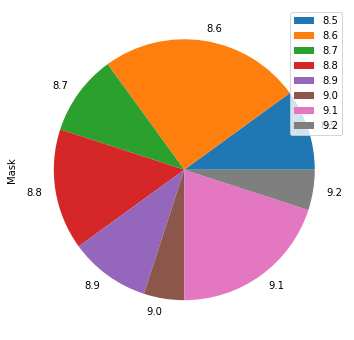

In [71]:
import matplotlib.pyplot as plt  #豆瓣评分前20的书籍中各个评分所占比例
df_mask.plot.pie(subplots = True, figsize = (6,6))#画饼图
plt.show()

In [52]:
df_infoList = df_info.reset_index()
df_infoList['评分排名'] = df_infoList.index + 1
df_infoList

,index,书名,作者,出版社,售价,豆瓣评分,评论数量,cmt_num,评分排名
0,18,少年凯歌,陈凯歌,人民文学出版社,10.00元,9.2,(5724人评价),5724,1
1,64,吞噬时间的恋人,王宇昆,天津人民出版社,42.00元,9.1,(23人评价),23,2
2,26,绿毛水怪,王小波,北京十月文艺出版社,39.00元,9.1,(5834人评价),5834,3
3,17,怦然心动,文德琳·范·德拉安南 陈常歌,百花洲文艺出版社,42.80元,9.1,(3865人评价),3865,4
4,16,平凡的世界,路遥,北京十月文艺出版社,99.00元,9.1,(17531人评价),17531,5
5,8,强风吹拂,三浦紫苑 林佩瑾、李建铨、杨正敏,广西师范大学出版社,39.00元,9.0,(12826人评价),12826,6
6,45,情书,岩井俊二 穆晓芳,南海出版公司,45.00元,8.9,(5098人评价),5098,7
7,87,血色浪漫,都梁,人民文学出版社,40.00元,8.9,(3296人评价),3296,8
8,50,潮骚,[日] 三岛由纪夫 张舟,北京十月文艺出版社,45元,8.8,(1956人评价),1956,9
9,65,白日事故,高台樹色 留守番,***,NTD 780元,8.8,(1379人评价),1379,10


In [43]:
df_maskF=df_ss.iloc[0:10]
df_Firstm=df_maskF[['书名','豆瓣评分']]
df_Firstm

,书名,豆瓣评分
18,少年凯歌,9.2
64,吞噬时间的恋人,9.1
26,绿毛水怪,9.1
17,怦然心动,9.1
16,平凡的世界,9.1
8,强风吹拂,9.0
45,情书,8.9
87,血色浪漫,8.9
50,潮骚,8.8
65,白日事故,8.8


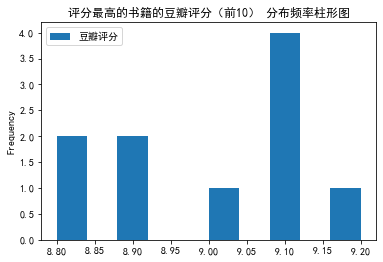

In [47]:
plt.rcParams['font.sans-serif'] = ['SimHei'] #显示中文汉字
df_Firstm.plot(kind = 'hist',title='评分最高的书籍的豆瓣评分（前10） 分布频率柱形图')#青春小说书籍中 评分最高的十本小说的豆瓣评分 分布频率柱形图
plt.show()

In [56]:
author = df[(True^df['作者'].isin([0]))]
author['aut_num'] = 1#添加计数器
author

,书名,作者,出版社,售价,豆瓣评分,评论数量,cmt_num,aut_num
0,撒野,巫哲,北京联合出版公司,45.00元,8.6,(29981人评价),29981,1
1,梦里花落知多少,郭敬明,春风文艺出版社,20.00元,7.1,(166270人评价),166270,1
2,挪威的森林,[日] 村上春树 林少华,上海译文出版社,18.80元,8.0,(322683人评价),322683,1
3,麦田里的守望者,[美国] J. D. 塞林格 孙仲旭,译林出版社,28.00元,8.1,(65185人评价),65185,1
4,那些回不去的年少时光,桐华,江苏文艺出版社,23.80元,8.4,(50640人评价),50640,1
...,...,...,...,...,...,...,...,...
84,陪安东尼度过漫长岁月,安东尼,长江文艺出版社,18.00元,8.3,(64622人评价),64622,1
85,像少年啦飞驰,韩寒,作家出版社,16.00元,7.3,(40419人评价),40419,1
86,西决,笛安,长江文艺出版社,22.80元,7.9,(56442人评价),56442,1
87,血色浪漫,都梁,人民文学出版社,40.00元,8.9,(3296人评价),3296,1


In [57]:
df_author = author[ ['作者','aut_num'] ].groupby(['作者']).sum()#按照作者进行分组，得到不同作者的图书数量
df_auth=df_author.sort_values(by=['aut_num'],ascending=False)
df_auth

,aut_num
作者,
郭敬明,5
顾漫,5
韩寒,5
[日] 村上春树 林少华,4
巫哲,3
...,...
安妮宝贝,1
安妮宝贝 原著、鬼鬼 改编绘画,1
安德烈·艾席蒙 权景,1


In [58]:
df_auinfo=df_auth.iloc[0:5]
df_auinfo

,aut_num
作者,
郭敬明,5
顾漫,5
韩寒,5
[日] 村上春树 林少华,4
巫哲,3


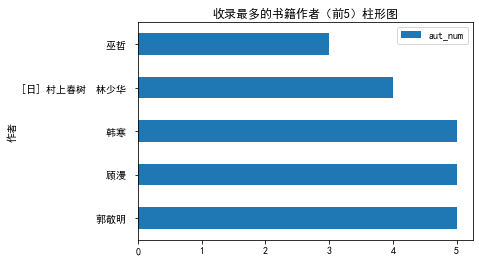

In [59]:
plt.rcParams['font.sans-serif'] = ['SimHei'] #显示中文汉字
df_auinfo.plot(kind = 'barh',title='收录最多的书籍作者（前5）柱形图')#青春小说书籍中 收录最多的前五位作者的柱形图
plt.show()

In [18]:
df['cmt_num']=df['评论数量'].str.replace(r'[^0-9]','')
df['cmt_num']=pd.to_numeric(df['cmt_num']).round(0).astype(int)
df_cmtsort=df.sort_values(by=['cmt_num'],ascending=False)
df_cmtmost=df_cmtsort.iloc[0:20]#评论数量最多前20的书籍信息
df_cmtmost.to_csv('评论数量最多前20的书籍信息.csv')
df_cmtmost

,书名,作者,出版社,售价,豆瓣评分,评论数量,cmt_num
2,挪威的森林,[日] 村上春树 林少华,上海译文出版社,18.80元,8.0,(322683人评价),322683
1,梦里花落知多少,郭敬明,春风文艺出版社,20.00元,7.1,(166270人评价),166270
13,何以笙箫默,顾漫,朝华出版社,15.00元,7.8,(139636人评价),139636
10,从你的全世界路过,张嘉佳,湖南文艺出版社,36.00元,7.0,(109384人评价),109384
48,三重门,韩寒 NONE、NONE,作家出版社,16.00元,7.4,(109085人评价),109085
5,挪威的森林,[日] 村上春树 林少华,上海译文出版社,23.00元,8.5,(108127人评价),108127
35,幻城,郭敬明,春风文艺出版社,28.00元,7.0,(102606人评价),102606
24,悲伤逆流成河,郭敬明,长江文艺出版社,24.00元,6.2,(101896人评价),101896
12,微微一笑很倾城,顾漫,江苏文艺出版社,25.00元,7.9,(96796人评价),96796
23,海边的卡夫卡,[日] 村上春树 林少华,上海译文出版社,25.00元,8.1,(92332人评价),92332


In [22]:
df_cmtmost1=df_cmtmost[['书名','cmt_num']].iloc[0:10]
df_cmtmost1

,书名,cmt_num
2,挪威的森林,322683
1,梦里花落知多少,166270
13,何以笙箫默,139636
10,从你的全世界路过,109384
48,三重门,109085
5,挪威的森林,108127
35,幻城,102606
24,悲伤逆流成河,101896
12,微微一笑很倾城,96796
23,海边的卡夫卡,92332


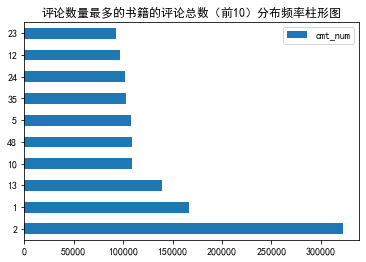

In [46]:
plt.rcParams['font.sans-serif'] = ['SimHei'] #显示中文汉字
df_cmtmost1.plot(kind = 'barh',title='评论数量最多的书籍的评论总数（前10）分布频率柱形图')#青春小说书籍中 评论数量最多的十本小说的评论数量 分布频率柱形图
plt.show()

In [34]:
df_comment = pd.read_csv("C:/Users/DELL/评论数量最多前20的书籍信息.csv")
df_comment=df_comment[['书名','cmt_num']]
df_comment

,书名,cmt_num
0,挪威的森林,322683
1,梦里花落知多少,166270
2,何以笙箫默,139636
3,从你的全世界路过,109384
4,三重门,109085
5,挪威的森林,108127
6,幻城,102606
7,悲伤逆流成河,101896
8,微微一笑很倾城,96796
9,海边的卡夫卡,92332


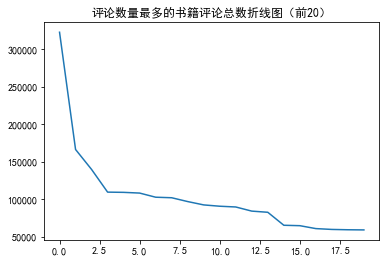

In [36]:
df_comment['cmt_num'].plot(title='评论数量最多的书籍评论总数折线图（前20）')
plt.show()